# 2 Boyutlu Şekil Fonksiyonları

Adım 4'te 1 boyutlu elemanların şekil fonksiyonları ele alınmıştı. Bu bölümde 2 boyutlu problemlere giriş yaparken 2 boyutlu elemanlara ait şekil fonksiyonlarını tanıtacağız.

2 boyutlu elemanlar, 1 boyutlu şekil fonksiyonlarının aksine birden fazla şekil çeşidini kullanarak bir geometriyi oluşturabilir. Bu duruma örnek olarak farklı üçgenlerden oluşmuş bir kareyi verebiliriz. Anlaşılacağı üzere oryantasyonları farklı olan her bir üçgen elemanın şekil fonksiyonu birbirinden farklı olacaktır. Fakat her bir üçgen için ayrı ayrı şekil fonksiyonları tanımlamak işi oldukça zorlaştıracaktır. Bu sebeple tüm elemanların şekil fonksiyonlarını, daha basit şekilli, şekil fonksiyonlarını ve bunların türevlerini kolayca elde edebileceğimiz bir eleman üzerinden elde etmemiz mümkündür. Bunun için bu elemanların koordinatlarını şekli düzgün olan elementin koordinat sistemi ile eşlememiz gerekmektedir. İlk önce 4 köşeli elemandan başlayabiliriz.

## 2.1 Lineer Dikdörtgen Elemanın Şekil Fonksiyonları 

Adım 4'ten hatırlanacağı üzere şekil fonksiyonları, elemanın bir ucunda 1'den başlayıp diğer ucunda azalarak 0'a ulaşan fonksiyonlardı. Bu gösterimi yine dörtgen bir eleman için düşünecek olursak dikdörtgenin bir köşesinin 1'den başlayıp diğer köşelerinde azalarak 0 değerini alan şekil fonksiyonları için yapabiliriz. Bu fonksiyonları görsel olarak göstermek konunun anlaşılmasını kolaylaştıracaktır. En genel haliyle bir dikdörtgen elemanını ve onun şekil fonksiyonlarını oluşturan 2 adet 1 boyutlu şekil fonksiyonunu aşağıdaki şekilde görebiliriz.

<img src="Resimler/Ders7/isoparametrik.png" align="center" width= "600"/>

Yukarıdaki dikdörtgen eleman için 2 noktasına ait şekil fonksiyonunu elde etmek için şeklin üstündeki ve solundaki 1 boyutlu şekil fonksiyonlarını çarpabiliriz. Bu durumda 2 noktasının şekil fonksiyonu:

$$N_2(x,y) = \frac{(a-x)(b+y)}{4ab}$$

olarak elde edilebilir. Eğer bu elemanı 2x2'lik ($a=b=1$) bir kare olarak düşünürsek ve sol üst noktasının koordinatlarını (-1,1) olarak alırsak 2 noktası için şekil fonksiyonu:

$$N_2(x,y) = \frac{(1-x)(1+y)}{4}$$

olur. Aynı işlemi diğer noktalardaki şekil fonksiyonlarını bulmak için yaparsak tüm şekil fonksiyonları:

$$N_1(x,y) = \frac{(1+x)(1+y)}{4}$$

$$N_2(x,y) = \frac{(1-x)(1+y)}{4}$$
$$\tag{1}$$
$$N_3(x,y) = \frac{(1-x)(1-y)}{4}$$

$$N_4(x,y) = \frac{(1+x)(1-y)}{4}$$

olarak elde edilir. Bu ifadeleri 3 boyutlu bir grafikte gösterelim:

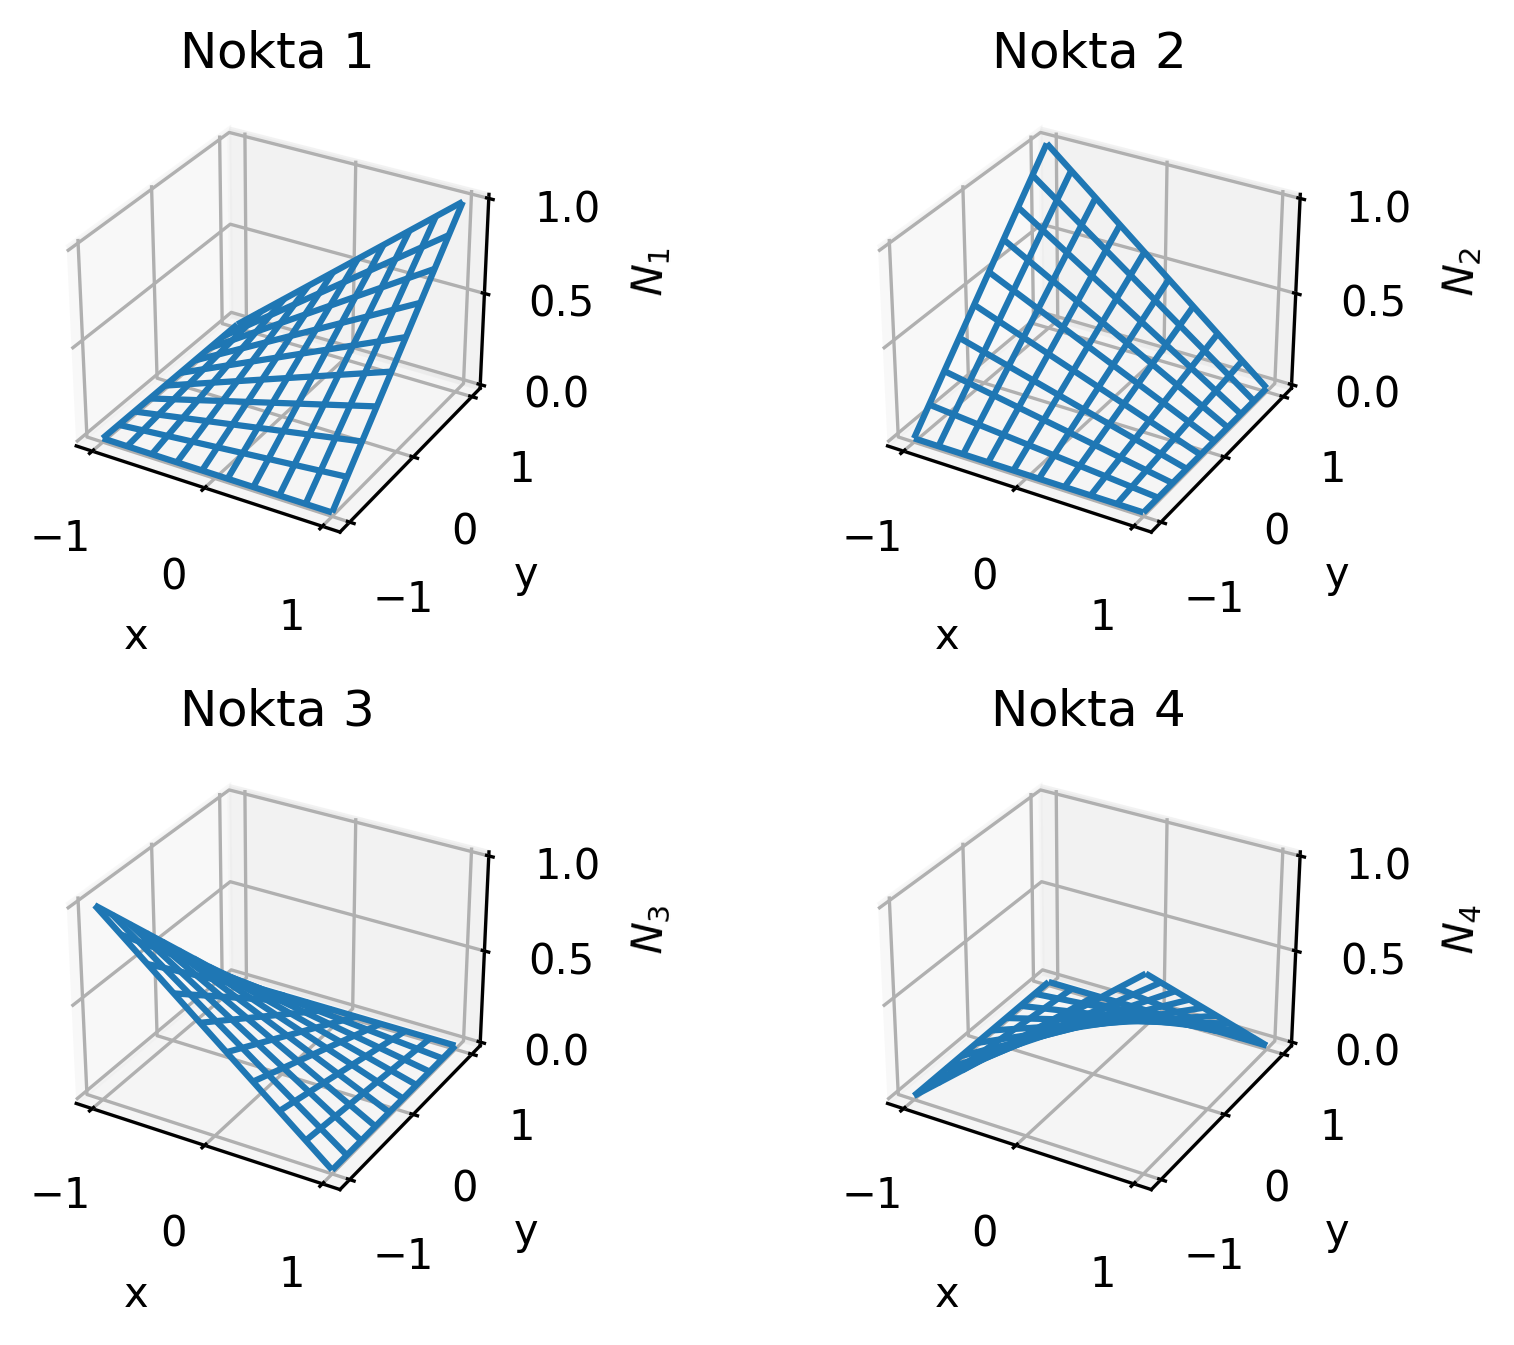

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 300

x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)
X, Y = np.meshgrid(x, y)

N_1 = (1+X)*(1+Y)/4
N_2 = (1-X)*(1+Y)/4
N_3 = (1-X)*(1-Y)/4
N_4 = (1+X)*(1-Y)/4

N = [N_1,N_2,N_3,N_4]

fig = plt.figure()

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    surf = ax.plot_wireframe(X, Y, N[i])
    ax.set_title(r'Nokta ${}$'.format(i+1))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(r'$N_{}$'.format(i+1))

plt.tight_layout(pad=3)
plt.show()

## İzoparametrik Dörtgen Elementler

Şimdi tüm dörtgen elemanlar için şekil fonksiyonunu kullanabileceğimiz bir referans eleman tanımlayacağız. Bu referans elemanı aşağıdaki şekilde farklı koordinat sisteminde tanımlayabiliriz:

<img src="Resimler/Ders7/referansEleman.png" align="center" width= "500"/>

Bu referans elemanı kullanarak ağımızdaki tüm lineer dikdörtgen elemanın şekil fonksiyonlarını elde edebiliriz. Bunun için izoparametrik eşleme denilen işlemi yapmamız gerekmektedir. Bu eşlemenin fiziksel anlamı şu şekilde açıklanabilir: 4 köşeli olduğu sürece herhangi bir dikdörtgen, bu referans şeklin içinde tanımlanabilir. Böylelikle fiziksel problemimizdeki şekli parçalayarak oluşturduğumuz ağdaki herhangi bir dörtgen bu referans şeklin içinde ifade edilebilir. Bu eşleme matematiksel olarak şu şekilde gösterilebilir:

$$x = \sum_{i=1}^n N_i(\xi,\eta)x_i, \qquad y = \sum_{i=1}^n N_i(\xi,\eta)y_i$$

ve

$$T(\xi,\eta) = \sum_{i=1}^n N_i(\xi,\eta)T_i.$$

Koordinatları eşlemek demek aynı zamanda o noktada bulunacak sıcaklık değerlerini de eşlemek demektir. Buradaki avantaj, ağın içerisinde bulunması çok zor olan herhangi bir elemana ait şekil fonksiyonlarını, referans eleman üzerine eşleyerek şekil fonksiyonlarını çok iyi bildiğimiz referans eleman üzerinden elde edebilmektir. Eğer biz bu şekil fonksiyonlarını elde edebilirsek, bir önceki bölümde türettiğimiz zayıf formda yer alan, şekil fonksiyonlarının türevlerini de kolaylıkla elde edebiliriz. 

Şimdi denklem 1'de tanımladığımız şekil fonksiyonlarını bu referans eleman için tekrar tanımlayalım:

$$N_1(\xi,\eta) = \frac{(1+\xi)(1+\eta)}{4}$$

$$N_2(\xi,\eta) = \frac{(1-\xi)(1+\eta)}{4}$$
$$\tag{2}$$
$$N_3(\xi,\eta) = \frac{(1-\xi)(1-\eta)}{4}$$

$$N_4(\xi,\eta) = \frac{(1+\xi)(1-\eta)}{4}$$

Şimdi matematik derslerinde gördüğümüz zincir kuralı ile $\xi$ ve $\eta$ için kısmi türevleri yazalım:

$$\frac{\partial}{\partial \xi} = \frac{\partial x}{\partial \xi}\frac{\partial}{\partial x}+\frac{\partial y}{\partial \xi}\frac{\partial}{\partial y}$$
$$\frac{\partial}{\partial \eta} = \frac{\partial x}{\partial \eta}\frac{\partial}{\partial x}+\frac{\partial y}{\partial \eta}\frac{\partial}{\partial y}$$

Yukarıdaki denklem sistemini matris formunda yazarsak:

$$
\begin{bmatrix}
\frac{\partial}{\partial \xi}\\
\frac{\partial}{\partial \eta}
\end{bmatrix}
=
\begin{bmatrix}
\frac{\partial x}{\partial \xi}  \frac{\partial y}{\partial \xi}\\
\frac{\partial x}{\partial \eta} \frac{\partial y}{\partial \eta}
\end{bmatrix}
\begin{bmatrix}
\frac{\partial}{\partial x}\\
\frac{\partial}{\partial y}
\end{bmatrix}
= \mathbf{J}
\begin{bmatrix}
\frac{\partial}{\partial x}\\
\frac{\partial}{\partial y}
\end{bmatrix}
\tag{3}
$$

elde edebiliriz. Burada $\mathbf{J}$, jakobi matrisi olarak adlandırılır. Bu matrisin içindeki değerler:

$$\frac{\partial x}{\partial \xi}= \sum_{i=1}^n \frac{\partial N_i(\xi,\eta)}{\partial \xi} x_i, \qquad\frac{\partial y}{\partial \xi}= \sum_{i=1}^n \frac{\partial N_i(\xi,\eta)}{\partial \xi} y_i$$
$$\frac{\partial x}{\partial \eta}= \sum_{i=1}^n \frac{\partial N_i(\xi,\eta)}{\partial \eta} x_i, \qquad\frac{\partial y}{\partial \eta}= \sum_{i=1}^n \frac{\partial N_i(\xi,\eta)}{\partial \eta} y_i$$

şeklinde hesaplanabilir. Bizim zayıf formda bulmamız gereken türevler 1. dereceden $x$ ve $y$'ye göre olması gerektiğinden 3. denklem:

$$
\begin{bmatrix}
\frac{\partial}{\partial x}\\
\frac{\partial}{\partial y}
\end{bmatrix}
= \mathbf{J^T}
\begin{bmatrix}
\frac{\partial}{\partial \xi}\\
\frac{\partial}{\partial \eta}
\end{bmatrix}
\tag{4}
$$

şeklinde yazılırsa bu eşitliği zayıf formu çözümlerken ileride yapacağımız matris formulasyonunda kullanabiliriz. Yani daha önceki derslerden hatırlanacağı üzere zayıf formdaki $N$ fonksiyonlarının $x$'e göre türevi:

$$
\begin{bmatrix}
\frac{\partial N}{\partial x}\\
\frac{\partial N}{\partial y}
\end{bmatrix}
= \mathbf{J^T}
\begin{bmatrix}
\frac{\partial N}{\partial \xi}\\
\frac{\partial N}{\partial \eta}
\end{bmatrix}
\tag{5}
$$

şeklinde yazılabilir.

Son olarak zayıf formda yer alacak olan $dA$ birim alanını referans koordinat düzleminde eşlememiz gerekmektedir. Aşağıdaki şekilde gerçekleştirmek istediğimiz alan eşlemesine göz atalım:
<img src="Resimler/Ders7/alanEsleme.png" align="center" width= "750"/>

Yukarıdaki şekilde sol tarafta referans eleman düzlemindeki birim alan, sağ tarafta ise aynı alanın global ağdaki karşılığı verilmiştir. Görüldüğü üzere sağdaki eleman global ağ içinde düzensiz (kıvrımlı) kenarlara sahip olabilir. Burada eşleme yapabilmek için sol taraftaki $d\eta d\xi$ alanını sağ taraftaki $dA$ cinsinden yazmalıyız. Sağdaki grafikte $\mathbf{a}$ vektörünü yataydaki birim uzunluk olarak ele alırsak:

$$\mathbf{a} = \frac{\partial x}{\partial \xi}d\xi+\frac{\partial y}{\partial \xi}d\xi$$

şeklinde yazabiliriz. Aynı şekilde $\mathbf{b}$ vektörünü 

$$\mathbf{b} = \frac{\partial x}{\partial \eta}d\eta+\frac{\partial y}{\partial \eta}d\eta$$

olarak ele alalım.

Şimdi çapraz çarpım işleminin geometrik anlamını hatırlayalım. Bu işleme göre 2 vektörün çapraz çarpımından elde edilen vektörün uzunluğu, o iki vektörü taradığı dörtgenin alanına eşit olacaktır. Basit bir örnek vermek üzerinden anlatacak olursak, $\mathbf{k}=[1, 0]$ ve $\mathbf{l}=[0, 2]$ vektörlerini ele alalım. Bu durumda $|\mathbf{k}|=1$ ve $|\mathbf{l}|=2$ olacaktır, yani bu vektörlerin taradığı alan 2 birim olmalıdır. Şimdi çapraz çarpım ile aynı sonucu bulmaya çalışalım:

$$A_{kl} = |\mathbf{k}\times\mathbf{l}| = |1\times2 - 0\times0| = 2 $$ 

Aynı işlemi yukarıdaki eşleme için yapacak olursak:

$$dA = |\mathbf{a} \times \mathbf{b}|$$

$\mathbf{a}$ ve $\mathbf{b}$ vektörlerini matris şeklinde yazarsak:

$$\mathbf{a} = 
\begin{bmatrix}
\frac{\partial x}{\partial \xi}\\
\frac{\partial y}{\partial \xi}
\end{bmatrix} d\xi
\qquad \text{ve} \qquad
\mathbf{b} = 
\begin{bmatrix}
\frac{\partial x}{\partial \eta}\\
\frac{\partial y}{\partial \eta}
\end{bmatrix} d\eta
$$
olur. Bu durumda:

$$|\mathbf{a} \times \mathbf{b}|= d\eta d\xi\Big|det
\Big(\begin{bmatrix}
\frac{\partial x}{\partial \xi} \frac{\partial x}{\partial \eta}\\
\frac{\partial y}{\partial \xi} \frac{\partial y}{\partial\eta}
\end{bmatrix}
\Big)\Big|$$

olacaktır. Dikkat edileceği üzere determinantı alınan matris jakobi matrisidir. Yani bu eşlemeyi son olarak şu şekilde yazabiliriz:

$$dA = d\eta d\xi det($\mathbf{J}$)$$